In [ ]:
#pip install praw

In [1]:
import praw
import pandas as pd
import matplotlib.pyplot as plt

### Extracting comments from a specific thread on reddit

In [2]:
#Authorizing - giive actual authentication details
reddit = praw.Reddit(
    client_id="-------",
    client_secret="----",
    password="-----",
    user_agent="----",
    username="----",
)

In [3]:
submission = reddit.submission(url ='https://www.reddit.com/r/chelseafc/comments/y89yv1/match_thread_brentford_vs_chelsea_english_premier/')

In [4]:
comments = []
time = []
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)
    comments.append(comment.body)
    time.append(comment.created_utc)

I am getting married later today and if we don’t win I’m not going
Best I’ve seen from Puli since the lockdown.
Just keep feeding Pulisic, the boy is feeling himself tonight
Pulisic on fire
Puli has been excellent
Puli has looked so positive since coming on
Pulisic has been so good
Ngl pulisic has been our best player today
Broja is fucking rapid holy shit
Puli and Sterling have been everything since they came on
Broja is the future striker!
Pulisic is the best player on the field.
Puli’s beating men on the run, pushing into the box, shooting, creating chances. He should’ve started
Was fun to watch but how did Mee not get at least a yellow, he didn’t event try to go for the ball, also, loved Broja today, he played his heart out, what you love to see really.
I’m liking broja muscling his way in to position. Giving off that costa vibes. Good lad
broja is a relentless workhorse. please be our new diego costa
Has to be Pulisic-Auba-Mount front 3 next game surely or Pulisic-Auba-Sterling
Ho

In [5]:
comments

['I am getting married later today and if we don’t win I’m not going',
 'Best I’ve seen from Puli since the lockdown.',
 'Just keep feeding Pulisic, the boy is feeling himself tonight',
 'Pulisic on fire',
 'Puli has been excellent',
 'Puli has looked so positive since coming on',
 'Pulisic has been so good',
 'Ngl pulisic has been our best player today',
 'Broja is fucking rapid holy shit',
 'Puli and Sterling have been everything since they came on',
 'Broja is the future striker!',
 'Pulisic is the best player on the field.',
 'Puli’s beating men on the run, pushing into the box, shooting, creating chances. He should’ve started',
 'Was fun to watch but how did Mee not get at least a yellow, he didn’t event try to go for the ball, also, loved Broja today, he played his heart out, what you love to see really.',
 'I’m liking broja muscling his way in to position. Giving off that costa vibes. Good lad',
 'broja is a relentless workhorse. please be our new diego costa',
 'Has to be Pulis

In [6]:
len(time)

3031

In [7]:
df = pd.DataFrame(list(zip(comments,time)),columns = ['comments','time'])
df = df.sort_values(by = 'time', ascending = True)
df

,comments,time
1772,We have a Discord server for our live chat [he...,1.666203e+09
0,I am getting married later today and if we don...,1.666203e+09
2062,Based\n\nCongrats btw my brother 💪💪💪,1.666203e+09
2751,Thanks man!,1.666204e+09
2060,!remindme 3 hours,1.666204e+09
...,...,...
2756,Honestly best case scenario was 2-0 win for us...,1.666287e+09
2753,Whenever the right one comes around again,1.666302e+09
2924,definitely. can’t take that away from Brentfor...,1.666303e+09
3023,"""Asses your own life and improve.""\n\nWow, rea...",1.666325e+09


In [8]:
#Saving as a CSV file
df.to_csv('reddit_comments.csv')

### Preprocessing comments 

In [10]:
df = pd.read_csv('reddit_comments.csv')

In [11]:
df['comments']

0       We have a Discord server for our live chat [he...
1       I am getting married later today and if we don...
2                    Based\n\nCongrats btw my brother 💪💪💪
3                                             Thanks man!
4                                       !remindme 3 hours
                              ...                        
3026    Honestly best case scenario was 2-0 win for us...
3027            Whenever the right one comes around again
3028    definitely. can’t take that away from Brentfor...
3029    "Asses your own life and improve."\n\nWow, rea...
3030                             Amazing isn't it ahahaha
Name: comments, Length: 3031, dtype: object

In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
df['comments'].loc[3]

'Thanks man!'

In [14]:
#removing \n from the comments
df['text'] = df['comments'].replace(r'\n',' ', regex=True)

In [15]:
df['text']

0                                                                                                                                                                                                                                                                         We have a Discord server for our live chat [here!](https://discord.gg/chelseafc)  Also, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect.  *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*
1                                                                                                                                                                                                                                                                                                         

### Sentiment Analysis

In [17]:
pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
df

,Unnamed: 0,comments,time,text
0,1772,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc)\n\nAlso, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*",1.666203e+09,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc) Also, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect. *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*"
1,0,I am getting married later today and if we don’t win I’m not going,1.666203e+09,I am getting married later today and if we don’t win I’m not going
2,2062,Based\n\nCongrats btw my brother 💪💪💪,1.666203e+09,Based Congrats btw my brother 💪💪💪
3,2751,Thanks man!,1.666204e+09,Thanks man!
4,2060,!remindme 3 hours,1.666204e+09,!remindme 3 hours
...,...,...,...,...
3026,2756,"Honestly best case scenario was 2-0 win for us, Brentford looked decent",1.666287e+09,"Honestly best case scenario was 2-0 win for us, Brentford looked decent"
3027,2753,Whenever the right one comes around again,1.666302e+09,Whenever the right one comes around again
3028,2924,definitely. can’t take that away from Brentford. they were solid but just seems that Broja has a Giroud like play style with a bit more of physique and pressing and so Auba and him upfront could’ve caused issues,1.666303e+09,definitely. can’t take that away from Brentford. they were solid but just seems that Broja has a Giroud like play style with a bit more of physique and pressing and so Auba and him upfront could’ve caused issues
3029,3023,"""Asses your own life and improve.""\n\nWow, really classy. I have no bitterness towards Potter at all, I think he is miles better than tuchel for a lot of reasons. You know you can critique someone without being on the other side of the political war? For example you can criticise pulisic without thinking mount is the best thing since sliced bread?\n\nIt isnt doomsday speak at all, we categorically did not play well the other night. Granted, Brentford are a great team and doing very well, but we did not play at our best the other night. Yes we have some players injured and a tight schedule, but resting our most affective players and tinkering is not the right thing to do against Brentford.",1.666325e+09,"""Asses your own life and improve."" Wow, really classy. I have no bitterness towards Potter at all, I think he is miles better than tuchel for a lot of reasons. You know you can critique someone without being on the other side of the political war? For example you can criticise pulisic without thinking mount is the best thing since sliced bread? It isnt doomsday speak at all, we categorically did not play well the other night. Granted, Brentford are a great team and doing very well, but we did not play at our best the other night. Yes we have some players injured and a tight schedule, but resting our most affective players and tinkering is not the right thing to do against Brentford."


In [21]:
#Calculating scores
scores = []
for i in df['text']:
    score = analyzer.polarity_scores(i)
    scores.append(score['compound'])

In [22]:
scores

[0.7345,
 0.5859,
 0.5267,
 0.4926,
 0.0,
 -0.2206,
 0.8553,
 -0.0711,
 0.1779,
 0.0,
 -0.2247,
 0.6486,
 0.0,
 0.5267,
 -0.7506,
 0.0,
 0.0,
 0.0,
 0.4767,
 0.7096,
 0.3182,
 -0.5362,
 0.4019,
 0.1779,
 0.5423,
 0.0,
 -0.4939,
 -0.1756,
 0.0,
 0.3612,
 0.0,
 -0.0129,
 0.1779,
 0.2023,
 0.9468,
 0.4215,
 -0.5574,
 0.4939,
 0.5994,
 -0.5719,
 0.4404,
 0.25,
 0.3412,
 0.0,
 0.0,
 0.0,
 0.3612,
 0.8481,
 0.6369,
 0.5122,
 0.4404,
 0.749,
 -0.743,
 -0.5859,
 -0.4019,
 -0.2263,
 0.0,
 0.0,
 0.8807,
 0.0,
 -0.6876,
 0.128,
 -0.305,
 -0.3182,
 0.2023,
 0.0,
 0.34,
 0.34,
 0.5789,
 0.6369,
 0.0,
 0.0,
 0.0,
 0.296,
 0.0,
 0.0,
 -0.5096,
 0.0,
 -0.5719,
 0.0,
 0.1027,
 0.0258,
 -0.4767,
 0.6369,
 0.0,
 0.2023,
 0.0,
 0.25,
 -0.5423,
 -0.4588,
 0.1796,
 0.1779,
 0.3182,
 0.4728,
 -0.6115,
 0.0,
 0.431,
 0.0,
 0.3612,
 0.0,
 0.6696,
 0.6249,
 0.0,
 0.4404,
 0.0,
 -0.7672,
 0.3612,
 0.7269,
 0.9022,
 0.1531,
 -0.296,
 0.0,
 0.0,
 -0.5106,
 0.0,
 0.0,
 0.3182,
 0.3612,
 0.5719,
 0.4215,
 0.5106,
 -

In [23]:
df['Polarity_score'] = scores

In [32]:
#Calculating Rolling Mean
df['ma'] = df['Polarity_score'].rolling(30,min_periods = 3).mean()

### Adjusting Time

In [33]:
df['actual_time']=(pd.to_datetime(df['time'],unit='s')) 
df

,Unnamed: 0,comments,time,text,Polarity_score,ma,actual_time
0,1772,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc)\n\nAlso, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*",1.666203e+09,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc) Also, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect. *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*",0.7345,NaN,2022-10-19 18:15:32
1,0,I am getting married later today and if we don’t win I’m not going,1.666203e+09,I am getting married later today and if we don’t win I’m not going,0.5859,NaN,2022-10-19 18:16:00
2,2062,Based\n\nCongrats btw my brother 💪💪💪,1.666203e+09,Based Congrats btw my brother 💪💪💪,0.5267,0.615700,2022-10-19 18:17:53
3,2751,Thanks man!,1.666204e+09,Thanks man!,0.4926,0.584925,2022-10-19 18:20:00
4,2060,!remindme 3 hours,1.666204e+09,!remindme 3 hours,0.0000,0.467940,2022-10-19 18:21:57
...,...,...,...,...,...,...,...
3026,2756,"Honestly best case scenario was 2-0 win for us, Brentford looked decent",1.666287e+09,"Honestly best case scenario was 2-0 win for us, Brentford looked decent",0.9001,0.122277,2022-10-20 17:32:45
3027,2753,Whenever the right one comes around again,1.666302e+09,Whenever the right one comes around again,0.0000,0.134317,2022-10-20 21:33:45
3028,2924,definitely. can’t take that away from Brentford. they were solid but just seems that Broja has a Giroud like play style with a bit more of physique and pressing and so Auba and him upfront could’ve caused issues,1.666303e+09,definitely. can’t take that away from Brentford. they were solid but just seems that Broja has a Giroud like play style with a bit more of physique and pressing and so Auba and him upfront could’ve caused issues,0.8176,0.155640,2022-10-20 21:50:09
3029,3023,"""Asses your own life and improve.""\n\nWow, really classy. I have no bitterness towards Potter at all, I think he is miles better than tuchel for a lot of reasons. You know you can critique someone without being on the other side of the political war? For example you can criticise pulisic without thinking mount is the best thing since sliced bread?\n\nIt isnt doomsday speak at all, we categorically did not play well the other night. Granted, Brentford are a great team and doing very well, but we did not play at our best the other night. Yes we have some players injured and a tight schedule, but resting our most affective players and tinkering is not the right thing to do against Brentford.",1.666325e+09,"""Asses your own life and improve."" Wow, really classy. I have no bitterness towards Potter at all, I think he is miles better than tuchel for a lot of reasons. You know you can critique someone without being on the other side of the political war? For example you can criticise pulisic without thinking mount is the best thing since sliced bread? It isnt doomsday speak at all, we categorically did not play well the other night. Granted, Brentford are a great team and doing very well, but we did not play at our best the other night. Yes we have some players injured and a tight schedule, but resting our most affective players and tinkering is not the right thing to do against Brentford.",0.9402,0.207810,2022-10-21 04:04:13


In [34]:
#Selecting only comments during the game
df_final = df[df['actual_time'] < "2022-10-19 20:45:00" ]
df_final

,Unnamed: 0,comments,time,text,Polarity_score,ma,actual_time
0,1772,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc)\n\nAlso, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*",1.666203e+09,"We have a Discord server for our live chat [here!](https://discord.gg/chelseafc) Also, a friendly reminder to report any comments that break our community guidelines and contribute to a toxic atmosphere - everyone deserves to be treated with respect. *I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/chelseafc) if you have any questions or concerns.*",0.7345,NaN,2022-10-19 18:15:32
1,0,I am getting married later today and if we don’t win I’m not going,1.666203e+09,I am getting married later today and if we don’t win I’m not going,0.5859,NaN,2022-10-19 18:16:00
2,2062,Based\n\nCongrats btw my brother 💪💪💪,1.666203e+09,Based Congrats btw my brother 💪💪💪,0.5267,0.615700,2022-10-19 18:17:53
3,2751,Thanks man!,1.666204e+09,Thanks man!,0.4926,0.584925,2022-10-19 18:20:00
4,2060,!remindme 3 hours,1.666204e+09,!remindme 3 hours,0.0000,0.467940,2022-10-19 18:21:57
...,...,...,...,...,...,...,...
2954,2641,Troll,1.666212e+09,Troll,0.0000,0.133360,2022-10-19 20:41:24
2955,2772,"Maybe you’re right, it was pretty close",1.666212e+09,"Maybe you’re right, it was pretty close",0.4939,0.149823,2022-10-19 20:41:34
2956,2885,Missed opportunities is what I could see to be fair.,1.666212e+09,Missed opportunities is what I could see to be fair.,0.4019,0.143527,2022-10-19 20:42:18
2957,2778,This is sarcasm right?,1.666212e+09,This is sarcasm right?,-0.2263,0.141913,2022-10-19 20:42:27


### Graph

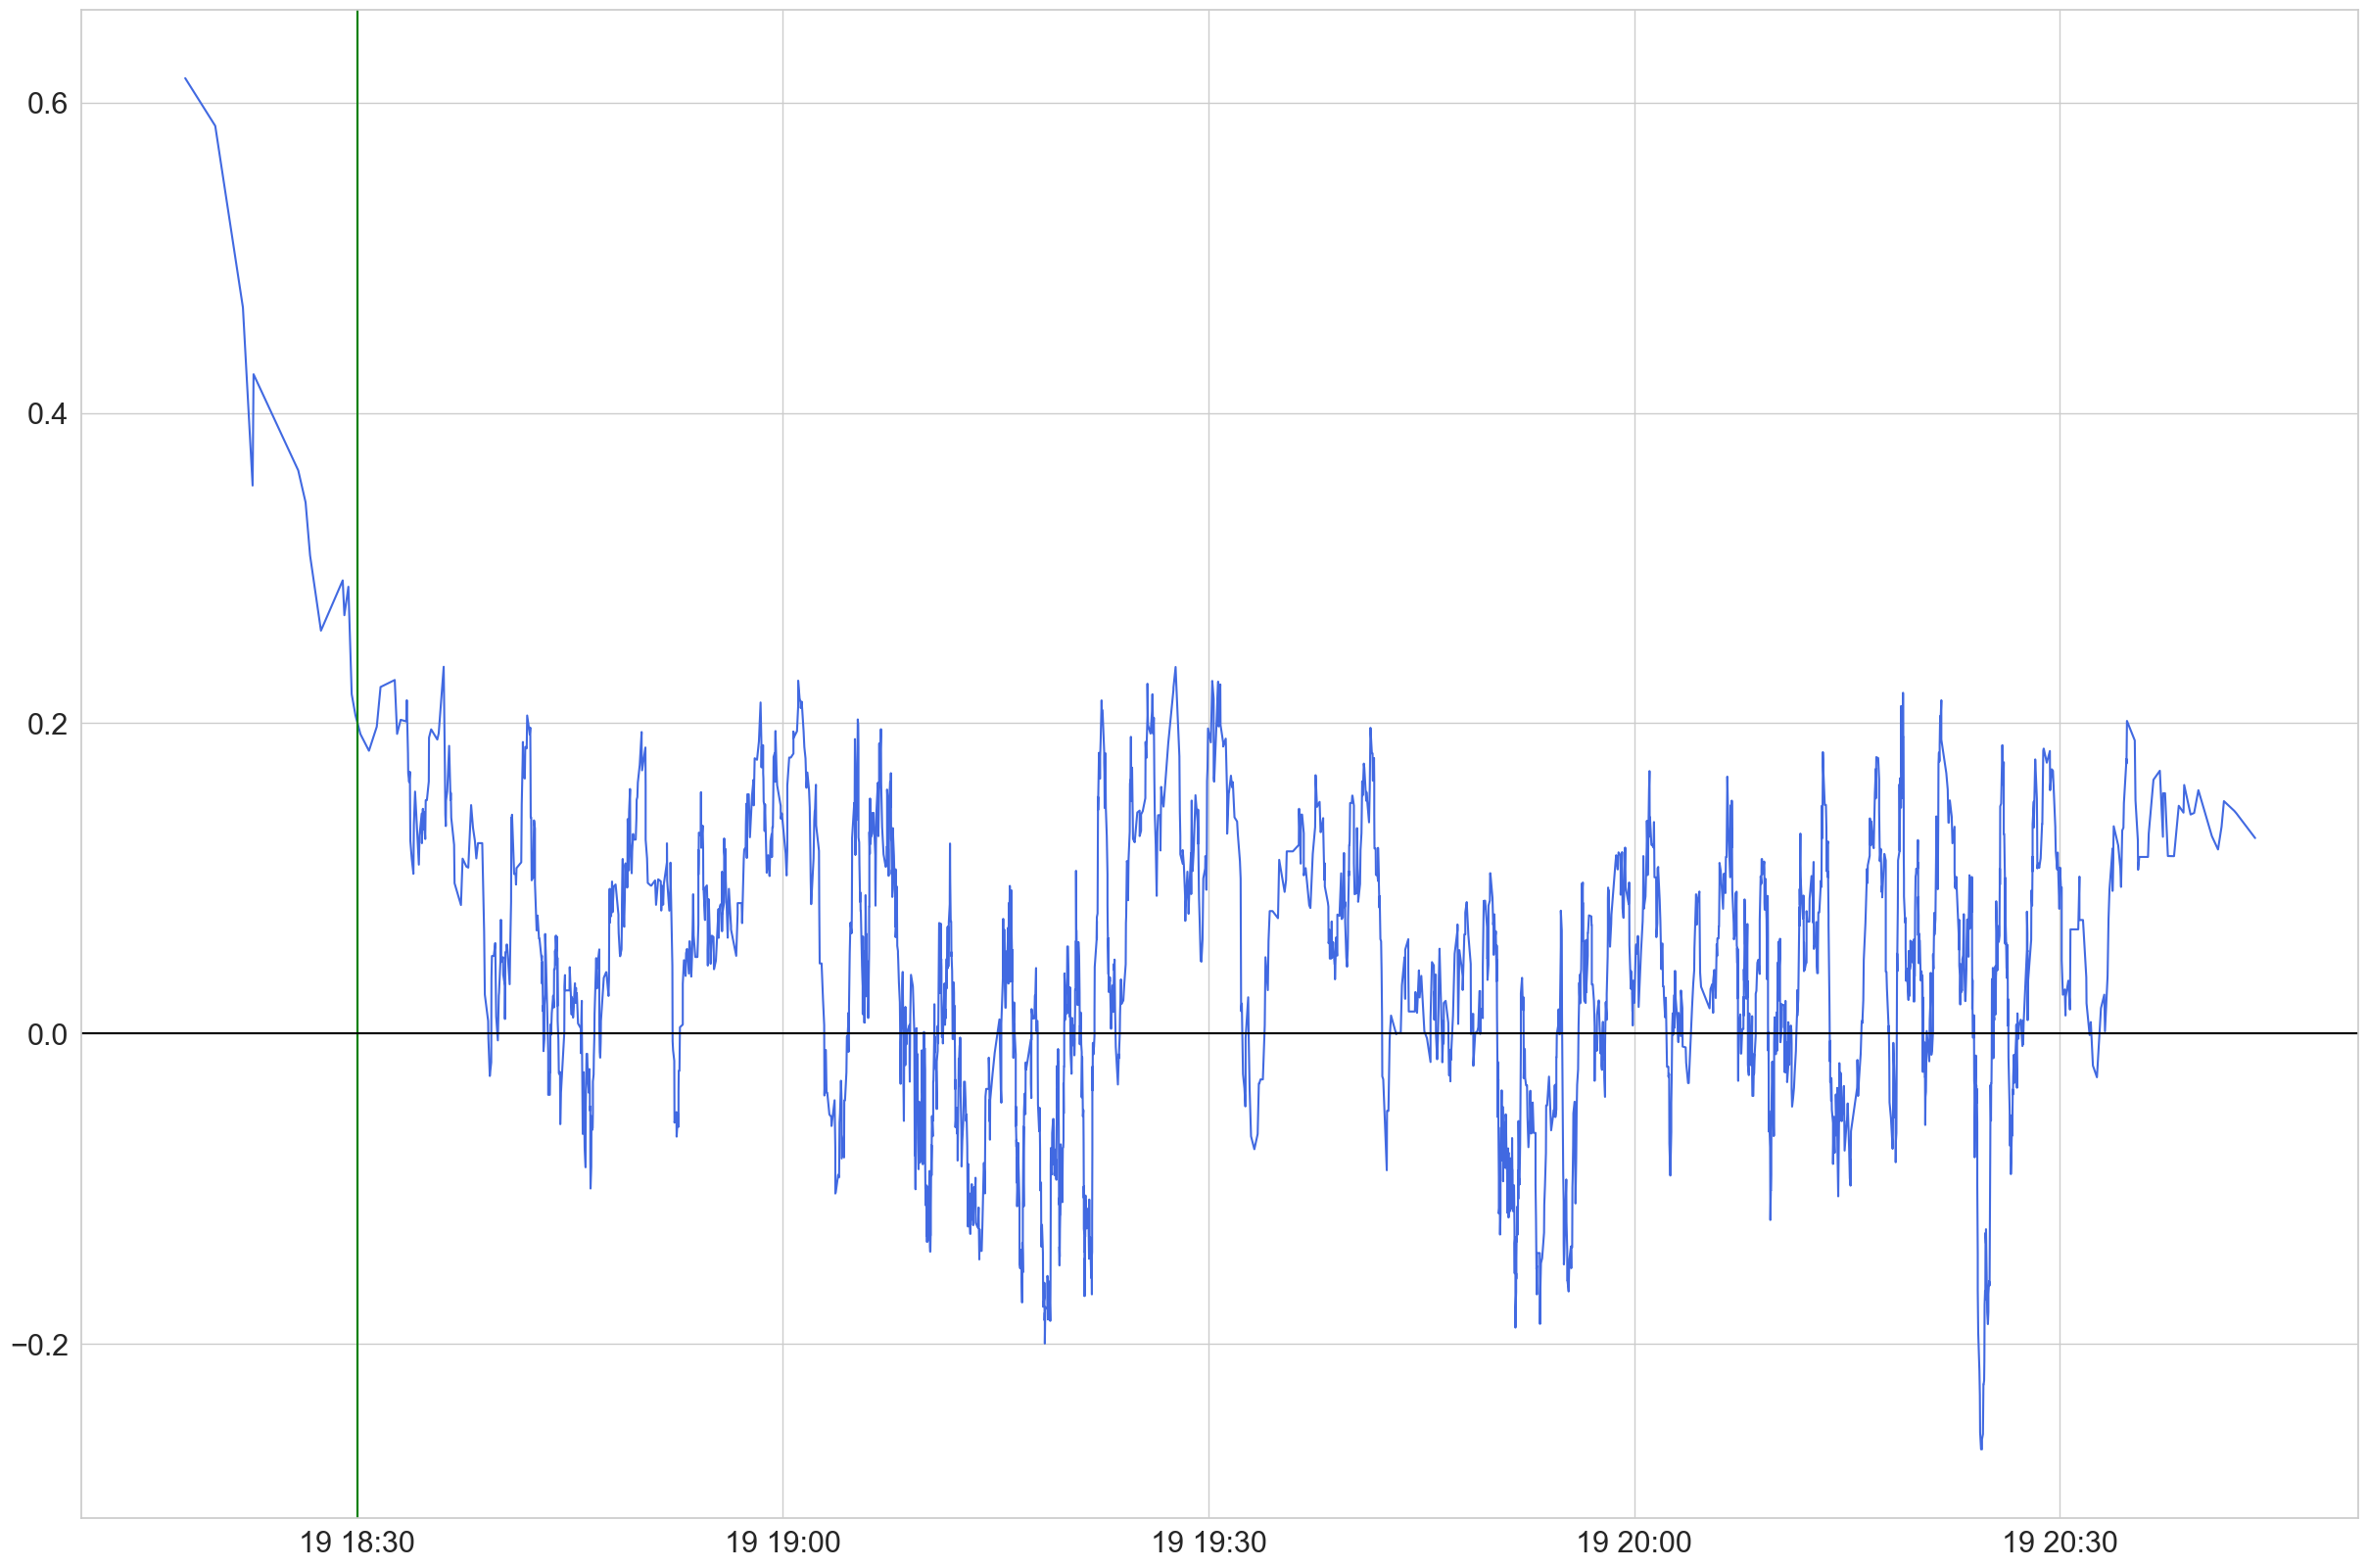

In [35]:
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns 

sns.set_theme(style = 'whitegrid', palette = 'deep', font_scale=2)
plt.figure(figsize = (30,20))
plt.plot(df_final['actual_time'],df_final['ma'], color = 'royalblue')
plt.axvline(datetime(2022,10,19,18,30,00), color='green', label='Match Start')
#plt.axvline(datetime(2022,10,19,18,30,00), color='b', label='Match Start')
plt.axhline(0,color = 'black')
plt.show()